# Visualize Weather Station Interactions on Map

In [52]:
# Install plotting library if not already done
!conda install basemap basemap-data-hires -y

Solving environment: done

## Package Plan ##

  environment location: /Users/andreas/anaconda3/envs/mllab-venv

  added / updated specs:
    - basemap-data-hires


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-data-hires-1.2.0   |                0       105.3 MB
    ------------------------------------------------------------
                                           Total:       105.3 MB

The following NEW packages will be INSTALLED:

  basemap-data-hires pkgs/main/osx-64::basemap-data-hires-1.2.0-0



basemap-data-hires-1 | 105.3 MB  | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [73]:
m = Basemap(projection='lcc', resolution='l',
            width=1.5E6, height=1.5E6, 
            lat_0=40, lon_0=-4.5)

In [154]:
def id_2_loc(i):
    lat = np.random.rand() * 8 + 36
    lon = np.random.rand() * 8 - 3.9
    return (lon, lat)

def plot_interactions(station_ids, latent_graph):
    fig = plt.figure(figsize=(8, 8))

    locations = [id_2_loc(i) for i in station_ids]
    pixel_coords = [m(*coords) for coords in locations]
    
    m.shadedrelief()
    m.drawcountries()
   # m.bluemarble()
#m.etopo()    
        
        
    # Plot Locations    
    for i, (x, y) in enumerate(pixel_coords):
        plt.plot(x, y, 'ok', markersize=5, color='white')
        plt.text(x, y, str(i), fontsize=12, color='white');
        
    # Draw Latent Graph
    n_atoms = len(station_ids)
    n_edge_types = latent_graph.shape[-1]
    
    colors = plt.get_cmap('Set1')
    
    for i in range(n_atoms):
        for j in range(n_atoms):
            for edge_type in range(n_edge_types):
                if latent_graph[i, j, edge_type] > 0.5:
                    # Draw Line
                    #x = pixel_coords[i]
                    #y = pixel_coords[j]
                    x = locations[i]
                    y = locations[j]
                    #plt.plot(x, y, color=colors(edge_type), lw=5)
                    m.drawgreatcircle(x[0], x[1], y[0], y[1], color=colors(edge_type))

In [155]:
station_ids = np.arange(5)
latent_graph = np.zeros((5, 5, 3))
latent_graph[:, 1, 0] = 1
latent_graph[3, 4, 2] = 1
for i in range(len(station_ids)):
    latent_graph[i, i, :] = 0

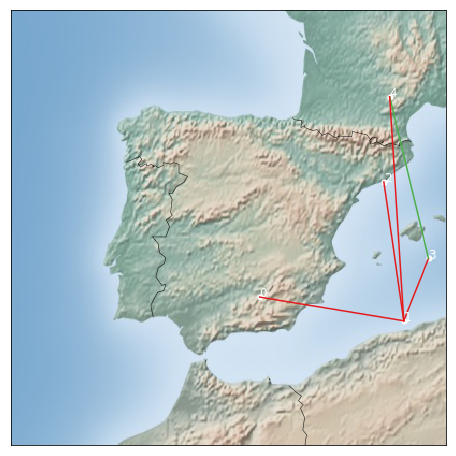

In [156]:
plot_interactions(station_ids, latent_graph)